In [13]:
import SimpleITK as sitk
import numpy as np
from os import listdir
from os.path import isfile, join, splitext
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [14]:
def windowedImage(image, wLevel, wWidth):
    wStart = wLevel - wWidth / 2
    imgray = (image - wStart) / wWidth

    imgray = np.clip(imgray, 0, 1.0)

    imgray = imgray * 255
    imgray = imgray.astype(np.uint8)

    return imgray

  0%|          | 0/20 [00:00<?, ?it/s]

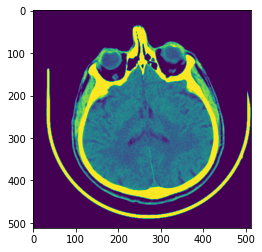

In [17]:
path = "./dicoms/test/"
dicoms = [f for f in listdir(path) if isfile(join(path, f))]
reader = sitk.ImageFileReader()
fileWriter = sitk.ImageFileWriter()

for i in tqdm(dicoms):
    reader.SetFileName('dicoms/test/'+i)
    dicom = reader.Execute()
    npdicom = sitk.GetArrayFromImage(dicom)
    
    windowLevel = 40
    windowWidth = 100
    windowstart = windowLevel - windowWidth / 2
    npgray = (npdicom[0] - windowstart) / windowWidth
    npgray = np.clip(npgray, 0, 1.0)
    npgray = npgray * 255
    npgray = npgray.astype(np.uint8)
    
    plt.imshow(npgray)
    
    img = sitk.GetImageFromArray(npgray, isVector=True)
    fileWriter.SetFileName("output/"+splitext(i)[0]+".png")
    fileWriter.Execute(img)